## PREPARATION AND DATALOADING 

In [64]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [65]:
titanic_survival = pd.read_csv("./data/train.csv")

In [66]:
titanic_survival

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [67]:
titanic_survival.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [68]:
titanic_survival.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [69]:
titanic_survival.groupby(["Sex"])["Survived"].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [70]:
titanic_survival.drop(columns=["Name","Ticket","Cabin"] , inplace = True)

In [71]:
titanic_survival

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C




$$
\text{survival rate} = \frac{\text{survived}}{\text{total}}
$$




In [72]:
survived_total = titanic_survival["Survived"].sum()
passengers_on_board = len(titanic_survival)

survival_rate = (survived_total / passengers_on_board) * 100
round(survival_rate , 2)

38.38

In [73]:
round(survival_rate , 2)

38.38

***There are a total of 38.38% chance of survival rate if you were to be on board on the Titanic***

In [74]:
titanic_survival.groupby(["Embarked"])["Embarked"].count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [75]:
titanic_survival.groupby(["Embarked"])["Survived"].sum()

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64

### Finding the survival chance of each Embarked

In [76]:
cherbourg_total , queenstown_total , southampton_total = 168 , 77 , 644

In [77]:
cherbourg_survive , queenstown_survive , southampton_survive = 93,30,217

In [78]:
C_rate , Q_rate , S_rate = ((cherbourg_survive * 100) / cherbourg_total) , ((queenstown_survive * 100) / queenstown_total) , ((southampton_survive * 100) / southampton_total)

In [79]:
print("Southampton Survival rate: " , S_rate , "%")

Southampton Survival rate:  33.69565217391305 %


In [80]:
print("Queenstown Survival rate: " , Q_rate , "%")

Queenstown Survival rate:  38.96103896103896 %


In [81]:
print("Cherbourg Survival rate: " , C_rate , "%")

Cherbourg Survival rate:  55.357142857142854 %


In [82]:
embarked_survival_rate = pd.DataFrame(round((titanic_survival.groupby(["Embarked"])["Survived"].sum()) * 100 / (titanic_survival.groupby(["Embarked"])["Embarked"].count()) , 2))
embarked_survival_rate.columns = ["Percentage"]
embarked_survival_rate

,Percentage
Embarked,
C,55.36
Q,38.96
S,33.70


# After suming up the total survival of each Embarked we can see that Cherbourg embarked seems to have the most chance of Survival rate of 55.35%
# And the least likely to survive is Southampton embark which is 33.69%
# While Queenstown have the survival rate of 38.96%

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


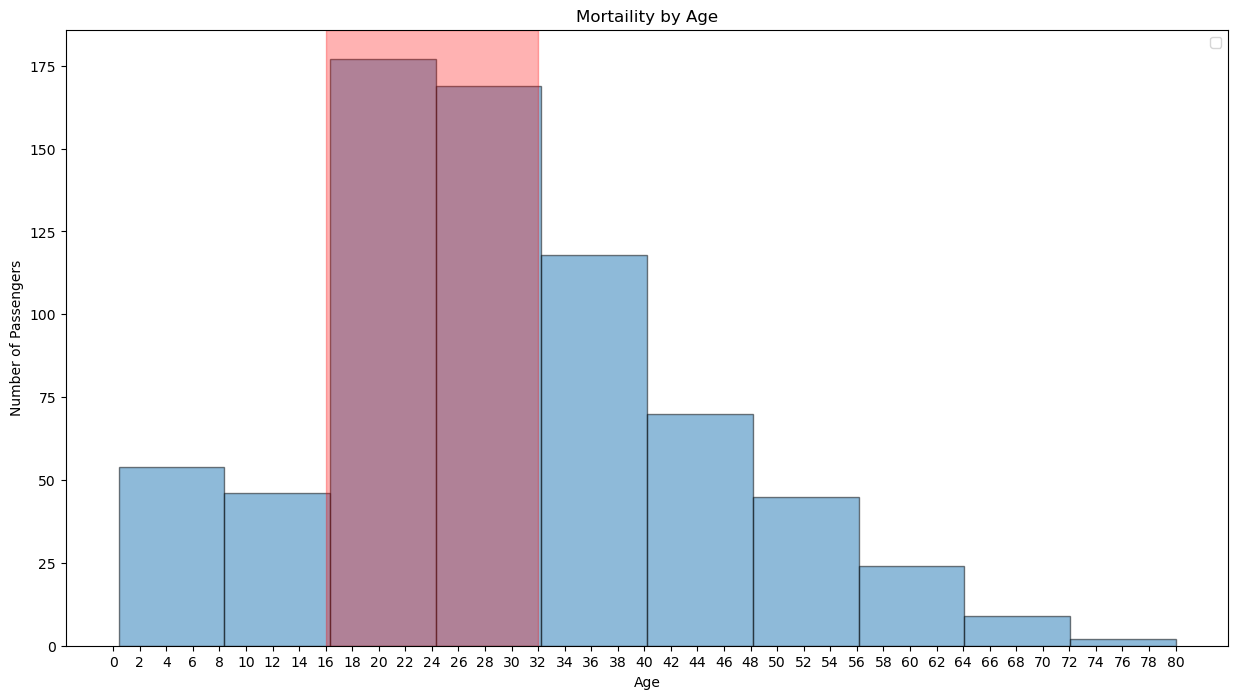

In [83]:
fig, ax = plt.subplots(figsize=(15, 8))

x = titanic_survival["Age"]

ax.hist(x, bins=10, alpha=0.5,edgecolor="black")
plt.xticks(np.arange(0, 82, 2))
plt.axvspan(16, 32, alpha=0.3, color='red')


ax.set_xlabel("Age")
ax.set_ylabel("Number of Passengers")
ax.set_title("Mortaility by Age")
ax.legend()

plt.show()

In [84]:
travel_alone = titanic_survival[(titanic_survival['Parch'] == 0) & (titanic_survival["SibSp"] == 0)]

In [85]:
travel_alone_total = len(travel_alone)

In [86]:
travel_alone.groupby(["Survived"])["Survived"].count()

Survived
0    374
1    163
Name: Survived, dtype: int64

In [87]:
travel_alone_survived = 163

In [88]:
alone_survival_rate = (travel_alone_survived * 100) / travel_alone_total

In [89]:
alone_survival_rate = round(alone_survival_rate , 2)

In [90]:
print("Traveling alone has the total survival rate of :" , alone_survival_rate , "%")

Traveling alone has the total survival rate of : 30.35 %


In [91]:
travel_together = titanic_survival[(titanic_survival['Parch'] > 0) & (titanic_survival["SibSp"] > 0)]

In [92]:
travel_together_total = len(travel_together)

In [93]:
travel_together.groupby("Survived")["Survived"].count()

Survived
0    80
1    62
Name: Survived, dtype: int64

In [94]:
travel_together_survived = 62

In [95]:
travel_together_survival_rate = (travel_together_survived * 100) / travel_together_total

In [96]:
travel_together_survival_rate = round(travel_together_survival_rate , 2)

In [97]:
print("The chance Survival rate of traveling together is :" , travel_together_survival_rate , "%")

The chance Survival rate of traveling together is : 43.66 %


# we found that if you were to travel with family memebers or together on board you have a more chance of being survived, which is 43.66%

In [98]:
titanic_survival["Members"] = titanic_survival["Parch"] + titanic_survival["SibSp"]

In [142]:
something = pd.DataFrame(titanic_survival.groupby("Members")["Survived"].count())
something

,Survived
Members,
0,537
1,161
2,102
3,29
4,15
5,22
6,12
7,6
10,7


Text(0.5, 1.0, 'Mortality by Family Member count')

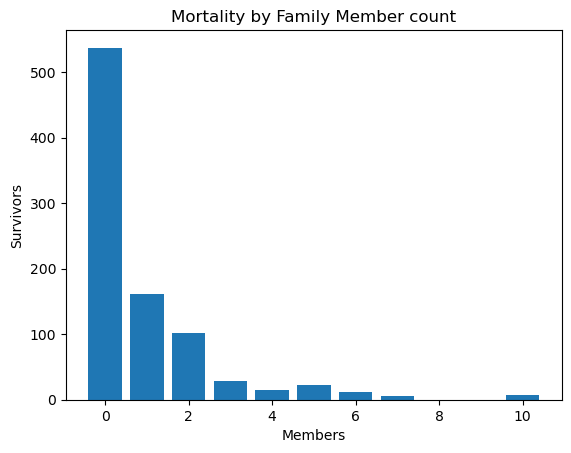

In [152]:
plt.bar(something.index, height=something["Survived"])
plt.xlabel("Members")
plt.ylabel("Survivors")
plt.title("Mortality by Family Member count")

In [100]:
members_survival_rate = pd.DataFrame(round((titanic_survival.groupby("Members")["Survived"].sum()) * 100 / (titanic_survival.groupby("Members")["Survived"].count()) , 2))
members_survival_rate.columns = ["Survival rate %"]
members_survival_rate

,Survival rate %
Members,
0,30.35
1,55.28
2,57.84
3,72.41
4,20.00
5,13.64
6,33.33
7,0.00
10,0.00


In [102]:
travel_alone

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
2,3,1,3,female,26.0,0,0,7.9250,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
11,12,1,1,female,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...,...
884,885,0,3,male,25.0,0,0,7.0500,S
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
889,890,1,1,male,26.0,0,0,30.0000,C


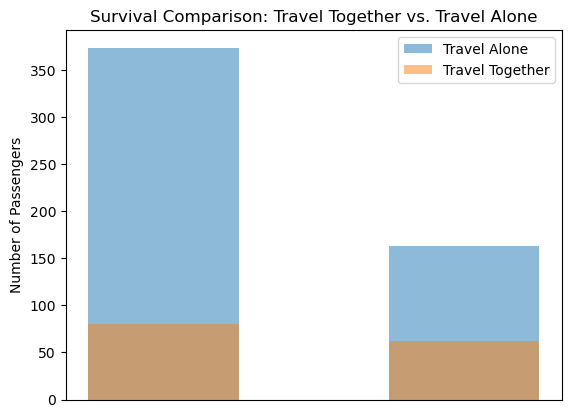

In [103]:
fig, ax = plt.subplots()

ax.hist(travel_alone["Survived"]    , bins=3   , alpha=0.5 , label="Travel Alone")
ax.hist(travel_together["Survived"] , bins=3   , alpha=0.5 , label="Travel Together")

ax.set_xticks([])
ax.set_ylabel("Number of Passengers")
ax.set_title("Survival Comparison: Travel Together vs. Travel Alone")
ax.legend()

plt.show()

<Axes: >

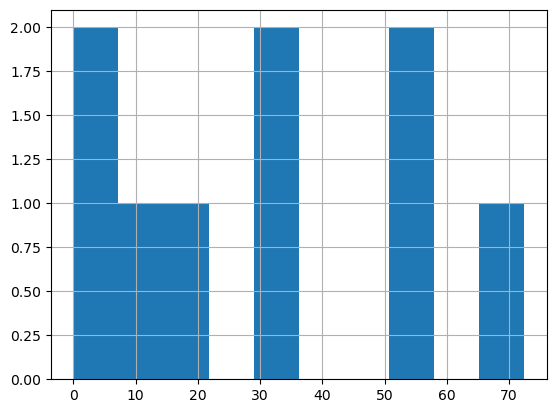

In [104]:
members_survival_rate["Survival rate %"].hist()

In [105]:
titanic_survival.groupby("Sex")["Sex"].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

In [106]:
titanic_survival.groupby("Sex")["Survived"].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [107]:
female_total , male_total = 314 , 577

In [108]:
female_survived , male_survived = 233,109

In [109]:
female_survival_rate = (female_survived * 100)/female_total
female_survival_rate = round(female_survival_rate , 2)

In [110]:
print("Female have the survival rate of :" , female_survival_rate , "%")

Female have the survival rate of : 74.2 %


In [111]:
male_survived_rate = (male_survived * 100) / male_total
male_survived_rate = round(male_survived_rate,2)

In [112]:
print("Male have the survival rate of :" , male_survived_rate , "%")

Male have the survival rate of : 18.89 %


In [113]:
sex_survival_rate = pd.DataFrame(round((titanic_survival.groupby("Sex")["Survived"].sum()) * 100 / titanic_survival.groupby("Sex")["Sex"].count() , 2))
sex_survival_rate.columns = ["Survival rate %"]
sex_survival_rate

,Survival rate %
Sex,
female,74.20
male,18.89


# By "Sex" group "Female" group have a higher chance of survival rate (74.2%) compared to "Male" which is 19%

In [114]:
titanic_survival.groupby("Pclass")["Pclass"].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

In [115]:
titanic_survival.groupby("Pclass")["Survived"].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [116]:
firstclass_total, secondclass_total , thirdclass_total = 216 , 184 , 491

In [117]:
firstclass_survived, secondclass_survived , thirdclass_survived = 136 , 87 , 119

In [118]:
firstclass_survival_rate , secondclass_survival_rate , thirdclass_survival_rate = ((firstclass_survived * 100) / firstclass_total) , ((secondclass_survived * 100) / secondclass_total) , ((thirdclass_survived * 100) / thirdclass_total)
firstclass_survival_rate , secondclass_survival_rate , thirdclass_survival_rate = round(firstclass_survival_rate, 2  ),round( secondclass_survival_rate ,2), round(thirdclass_survival_rate , 2)  

In [119]:
print("The first class has the survival rate of :", firstclass_survival_rate, "%")

The first class has the survival rate of : 62.96 %


In [120]:
print("The first class has the survival rate of :", secondclass_survival_rate, "%")

The first class has the survival rate of : 47.28 %


In [121]:
print("The first class has the survival rate of :", thirdclass_survival_rate, "%")

The first class has the survival rate of : 24.24 %


In [122]:
Pclass_survival_rate = pd.DataFrame(round(((titanic_survival.groupby("Pclass")["Survived"].sum() * 100) / titanic_survival.groupby("Pclass")["Pclass"].count()) ,2))
Pclass_survival_rate.columns = ["Survival rate %"]
Pclass_survival_rate

,Survival rate %
Pclass,
1,62.96
2,47.28
3,24.24


# First class have the highest chance of survival rate which is 62.96%
# Second class have the survival rate of 47.28%
# Third class have the survival rate of 24.24%

In [123]:
kids = titanic_survival[(titanic_survival["Age"] > 0 ) & (titanic_survival["Age"] <= 17)]
young_adult = titanic_survival[(titanic_survival["Age"] > 17 ) & (titanic_survival["Age"] <= 40)]
adult = titanic_survival[(titanic_survival["Age"] > 40 ) & (titanic_survival["Age"] <= 60)]
elderly = titanic_survival[titanic_survival["Age"] > 60]

In [124]:
kids_total , young_adult_total , adult_total , elderly_total = len(kids) , len(young_adult) , len(adult) , len(elderly)

In [125]:
kids_total/714

0.15826330532212884

In [126]:
kids_survived , young_adult_survived , adult_survived , elderly_survived = kids["Survived"].sum() , young_adult["Survived"].sum() , adult["Survived"].sum() , elderly["Survived"].sum()

In [127]:
kids_survival_rate = round((kids_survived * 100) / kids_total , 2)
print("Survival rate of Kids is :" , kids_survi`val_rate , "%")

SyntaxError: invalid syntax (3442361645.py, line 2)

In [ ]:
young_adult_survival_rate = round((young_adult_survived * 100) / young_adult_total , 2)
print("Survival rate of Young adult is :" , young_adult_survival_rate , "%")

Survival rate of Young adult is : 38.58 %


In [ ]:
adult_survival_rate = round((adult_survived * 100) / adult_total , 2)
print("Survival rate of adult is :" , adult_survival_rate , "%")

Survival rate of adult is : 39.06 %


In [ ]:
elderly_survival_rate = round((elderly_survived * 100) / elderly_total , 2)
print("Survival rate of elderly person is :" , elderly_survival_rate , "%")

Survival rate of elderly person is : 22.73 %


# Kids have the Survival rate of 53.98% (0 - 17) Years old
# Young Adult have the Survival rate of 38.58% (18 - 40) Years old
# Adult have the Survival rate of 39.06% (41 - 60) Years old
# Elderly have the Survival rate of 22.73% (60+) Years old

In [ ]:
age_cat = {'kids':  kids ,"young adult" :  young_adult ,"adult" :  adult , "elderly" :  elderly }

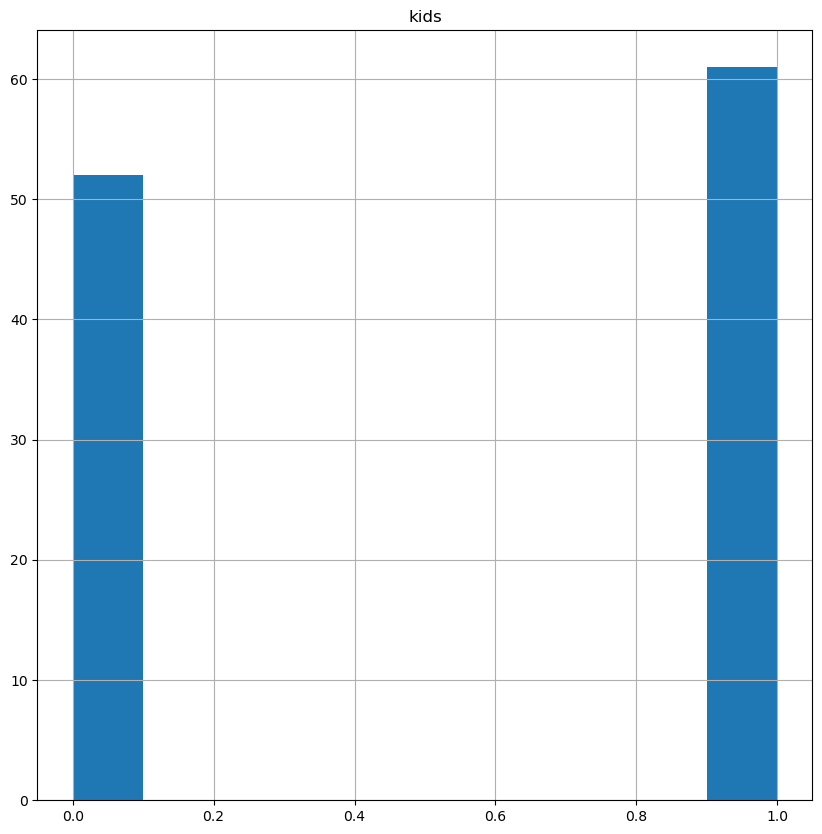

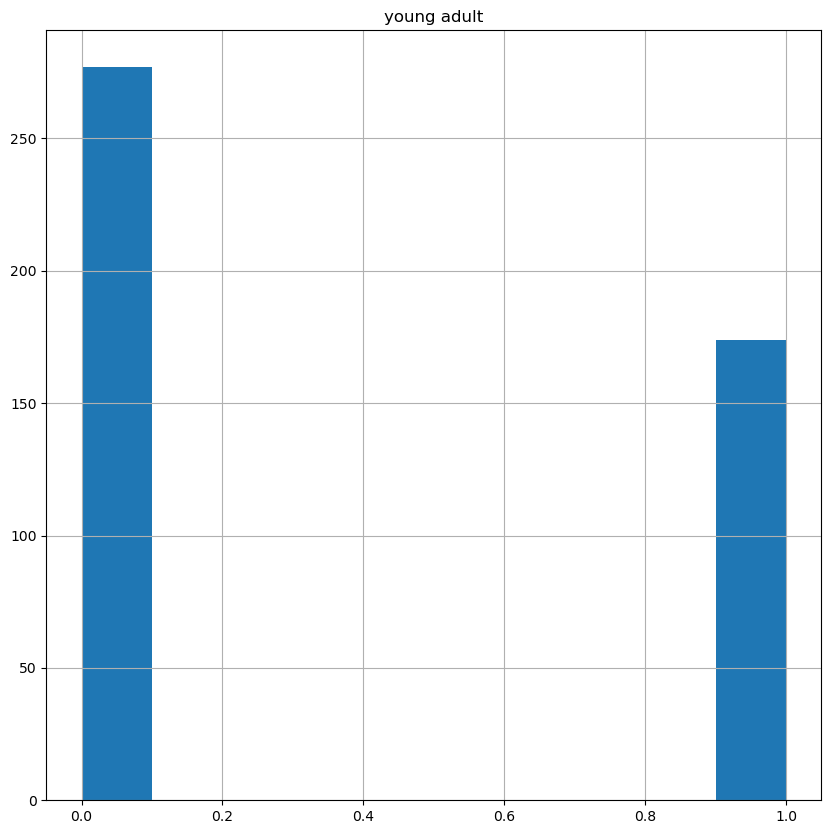

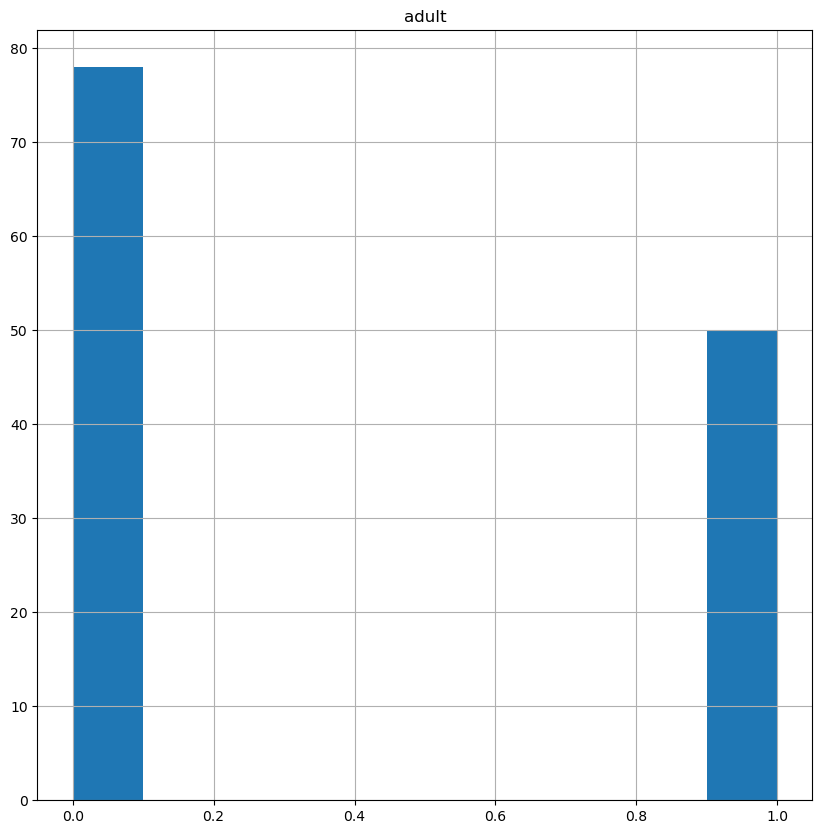

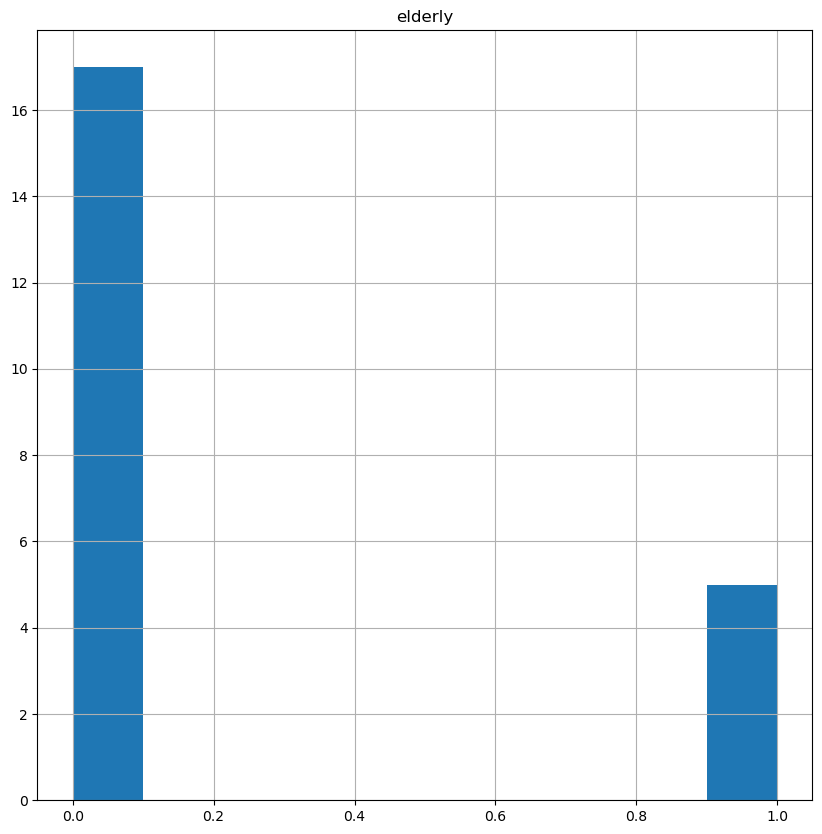

In [ ]:
for i in age_cat.items():
    plt.figure(figsize=(10,10))
    i[1]["Survived"].hist()
    plt.title(i[0])

Text(0.5, 1.0, 'Travel Alone')

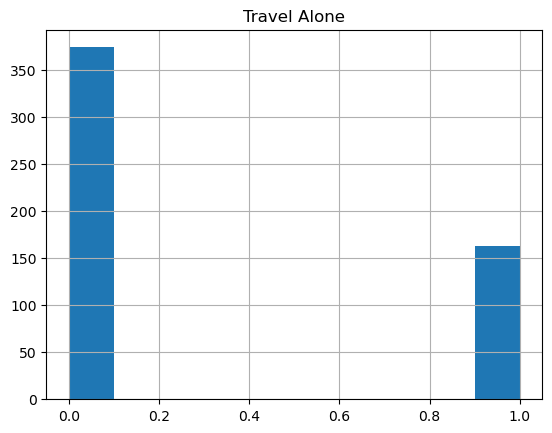

In [ ]:
travel_alone["Survived"].hist()
plt.title("Travel Alone")

Text(0.5, 1.0, 'Travel Together')

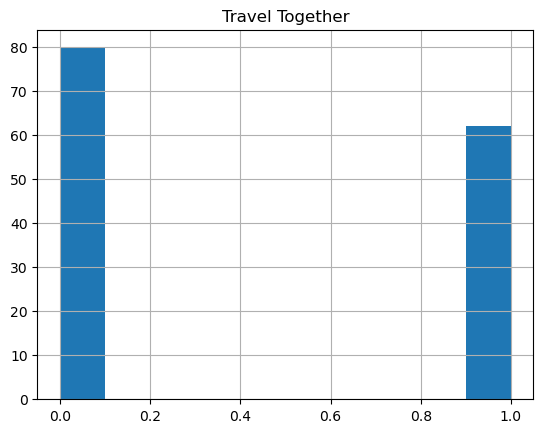

In [ ]:
travel_together["Survived"].hist()
plt.title("Travel Together")

Text(0.5, 1.0, 'Male')

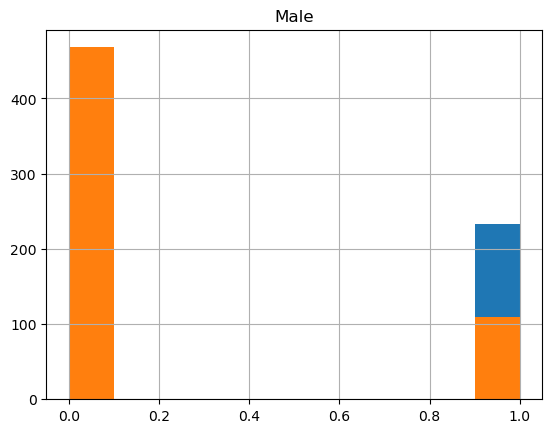

In [153]:
titanic_survival[titanic_survival["Sex"] == "female"]["Survived"].hist()
plt.title("Female")
titanic_survival[titanic_survival["Sex"] == "male"]["Survived"].hist()
plt.title("Male")


In [166]:
male = titanic_survival["Sex"] == "male"
female = titanic_survival["Sex"] == "female"

alive = ["Survived"] ==  
dead = 

titanic_survival[male]["Survived"]

0      0
4      0
5      0
6      0
7      0
      ..
883    0
884    0
886    0
889    1
890    0
Name: Survived, Length: 577, dtype: int64

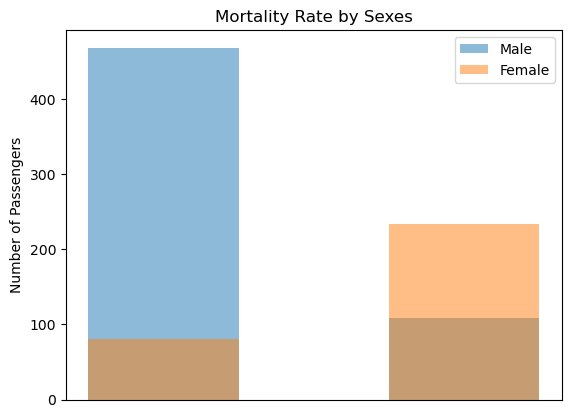

In [160]:
fig, ax = plt.subplots()

ax.hist(titanic_survival[titanic_survival["Sex"] == "male"]["Survived"] , bins=3   , alpha=0.5 , label="Male")
ax.hist(titanic_survival[titanic_survival["Sex"] == "female"]["Survived"], bins=3   , alpha=0.5 , label="Female")

ax.set_xticks([])
ax.set_ylabel("Number of Passengers")
ax.set_title("Mortality Rate by Sexes")
ax.legend()

plt.show()

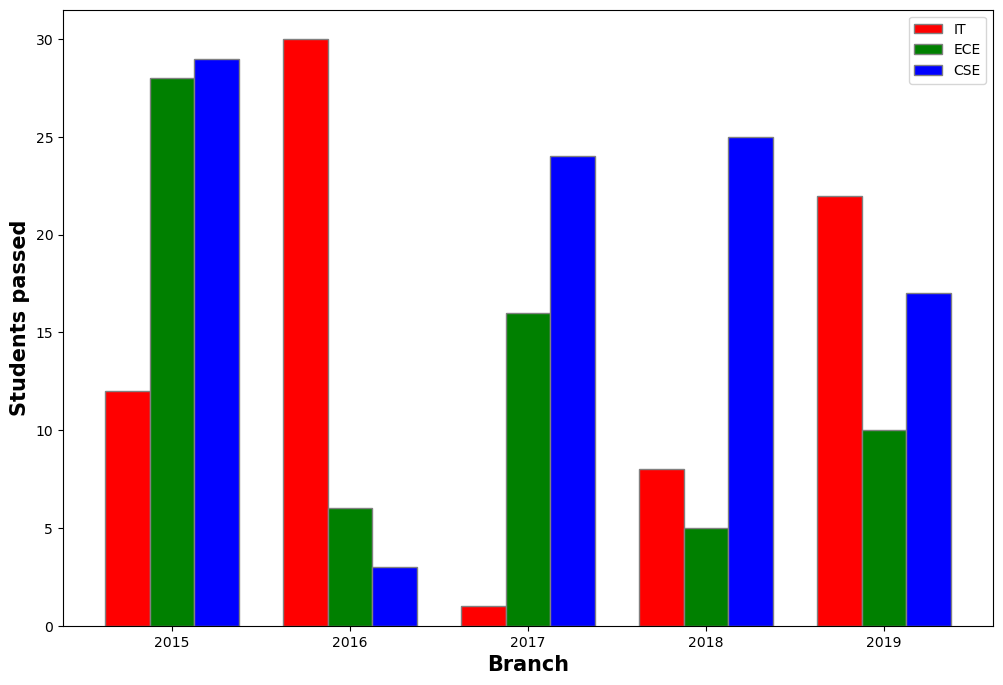

In [161]:
import numpy as np 
import matplotlib.pyplot as plt 

# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 

# set height of bar 
IT = [12, 30, 1, 8, 22] 
ECE = [28, 6, 16, 5, 10] 
CSE = [29, 3, 24, 25, 17] 

# Set position of bar on X axis 
br1 = np.arange(len(IT)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth, 
        edgecolor ='grey', label ='IT') 
plt.bar(br2, ECE, color ='g', width = barWidth, 
        edgecolor ='grey', label ='ECE') 
plt.bar(br3, CSE, color ='b', width = barWidth, 
        edgecolor ='grey', label ='CSE') 

# Adding Xticks 
plt.xlabel('Branch', fontweight ='bold', fontsize = 15) 
plt.ylabel('Students passed', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(IT))], 
        ['2015', '2016', '2017', '2018', '2019'])

plt.legend()
plt.show() 


Text(0.5, 1.0, 'S Embark')

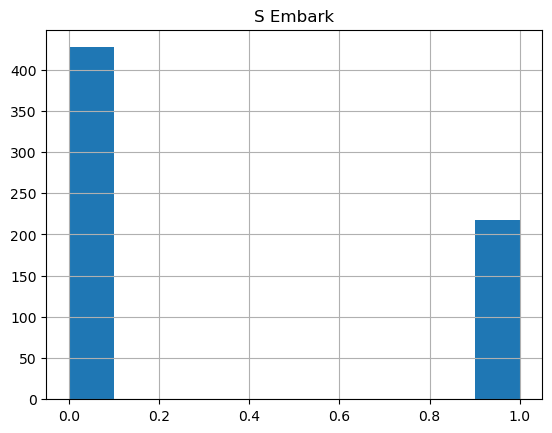

In [ ]:
embark[embark["Embarked"] == "S"]["Survived"].hist()
plt.title("S Embark")

Text(0.5, 1.0, 'C Embark')

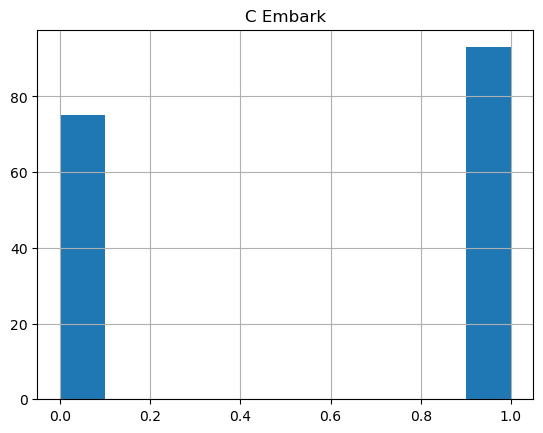

In [ ]:
embark[embark["Embarked"] == "C"]["Survived"].hist()
plt.title("C Embark")

Text(0.5, 1.0, 'Q Embark')

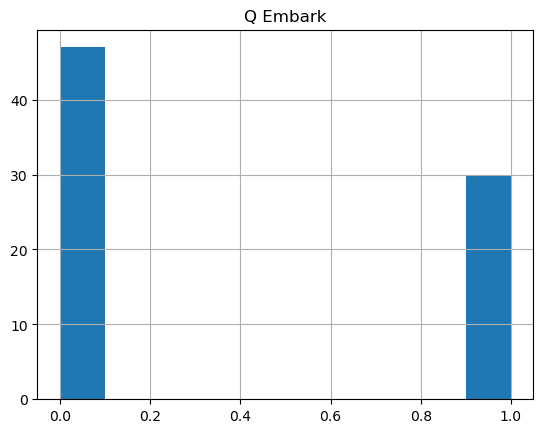

In [ ]:
embark[embark["Embarked"] == "Q"]["Survived"].hist()
plt.title("Q Embark")

Text(0.5, 1.0, 'Survived')

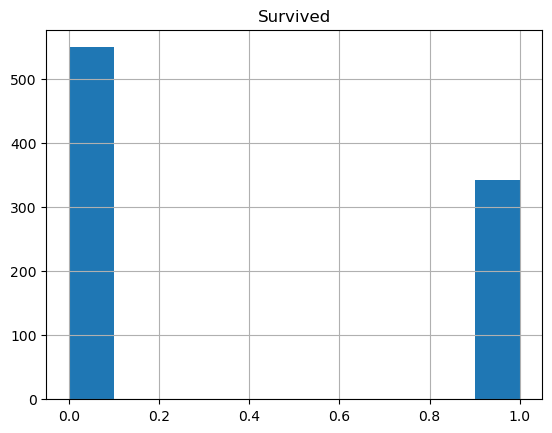

In [ ]:
titanic_survival["Survived"].hist()
plt.title("Survived")

Text(0.5, 1.0, 'Pclass 1')

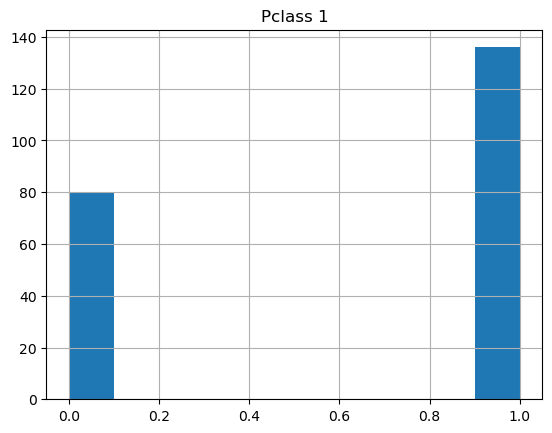

In [ ]:
titanic_survival[titanic_survival["Pclass"] == 1]["Survived"].hist()
plt.title("Pclass 1")

Text(0.5, 1.0, 'Pclass 2')

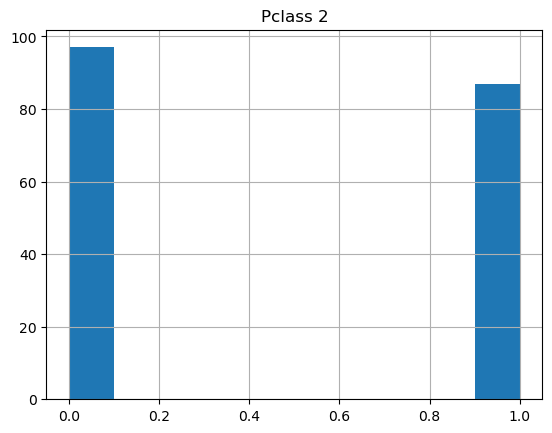

In [ ]:
titanic_survival[titanic_survival["Pclass"] == 2]["Survived"].hist()
plt.title("Pclass 2")

Text(0.5, 1.0, 'Pclass 3')

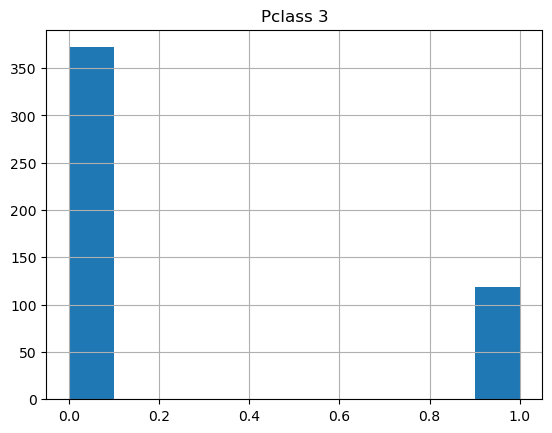

In [ ]:
titanic_survival[titanic_survival["Pclass"] == 3]["Survived"].hist()
plt.title("Pclass 3")

In [ ]:
[titanic_survival["Survived"] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,['Embarked']_C,['Embarked']_Q,['Embarked']_S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",0,15.0,0,0,2667,7.2250,NaN,1,0,0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,0,1,11767,83.1583,C50,1,0,0
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",0,25.0,0,1,230433,26.0000,NaN,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,0,0,1


In [ ]:
df_fare.head(60)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


In [ ]:
titanic_survival

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Members
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,1
2,3,1,3,female,26.0,0,0,7.9250,S,0
3,4,1,1,female,35.0,1,0,53.1000,S,1
4,5,0,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,0
887,888,1,1,female,19.0,0,0,30.0000,S,0
888,889,0,3,female,NaN,1,2,23.4500,S,3
889,890,1,1,male,26.0,0,0,30.0000,C,0


In [ ]:
sex_norm = titanic_survival["Sex"].replace({"male" : 1 , "female": 0})

In [ ]:
correlation_titanic_survival = titanic_survival.select_dtypes(["float64" , "int64"])

In [ ]:
correlation_titanic_survival["Sex"] = sex_norm

In [ ]:
correlation_titanic_survival.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Members,Sex
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.040143,0.042939
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639,-0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997,0.131900
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914,0.093254
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111,-0.245489
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138,-0.182333
Members,-0.040143,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000,-0.200988
Sex,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,-0.200988,1.000000


<Axes: >

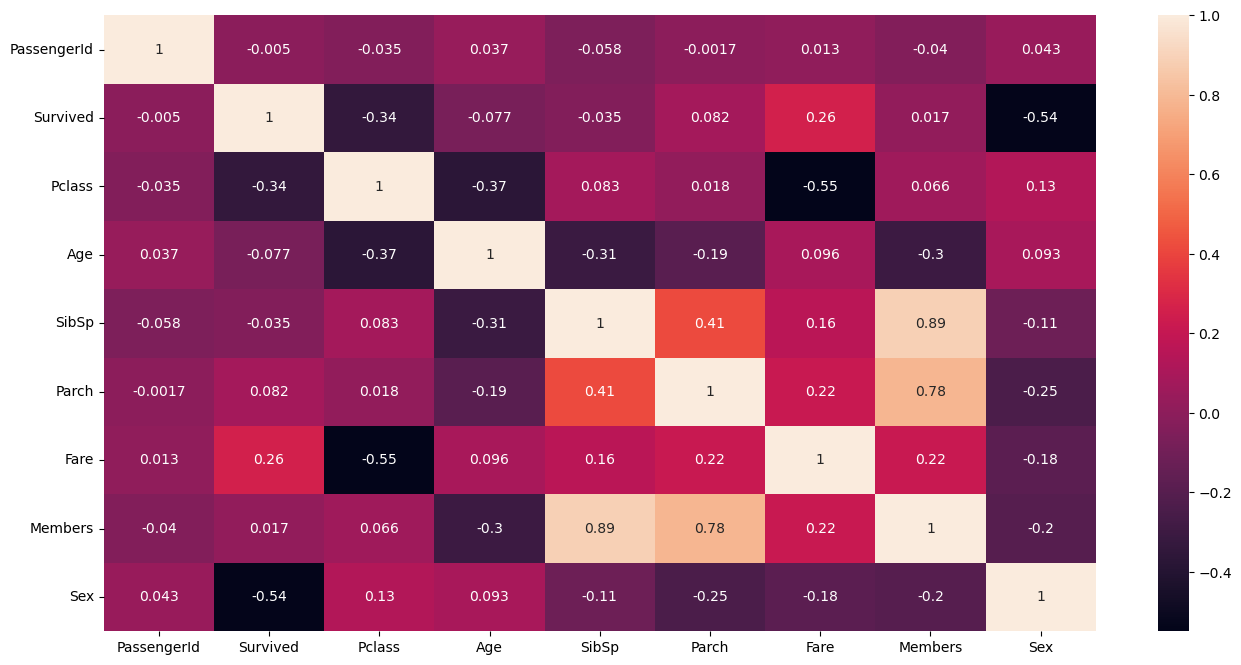

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(data=correlation_titanic_survival.corr(), annot=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x169e3b190>,
 'caps': [<matplotlib.lines.Line2D at 0x169e42450>,
 'boxes': [<matplotlib.lines.Line2D at 0x143389bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x169e45450>],
 'fliers': [<matplotlib.lines.Line2D at 0x169e46850>],
 'means': []}

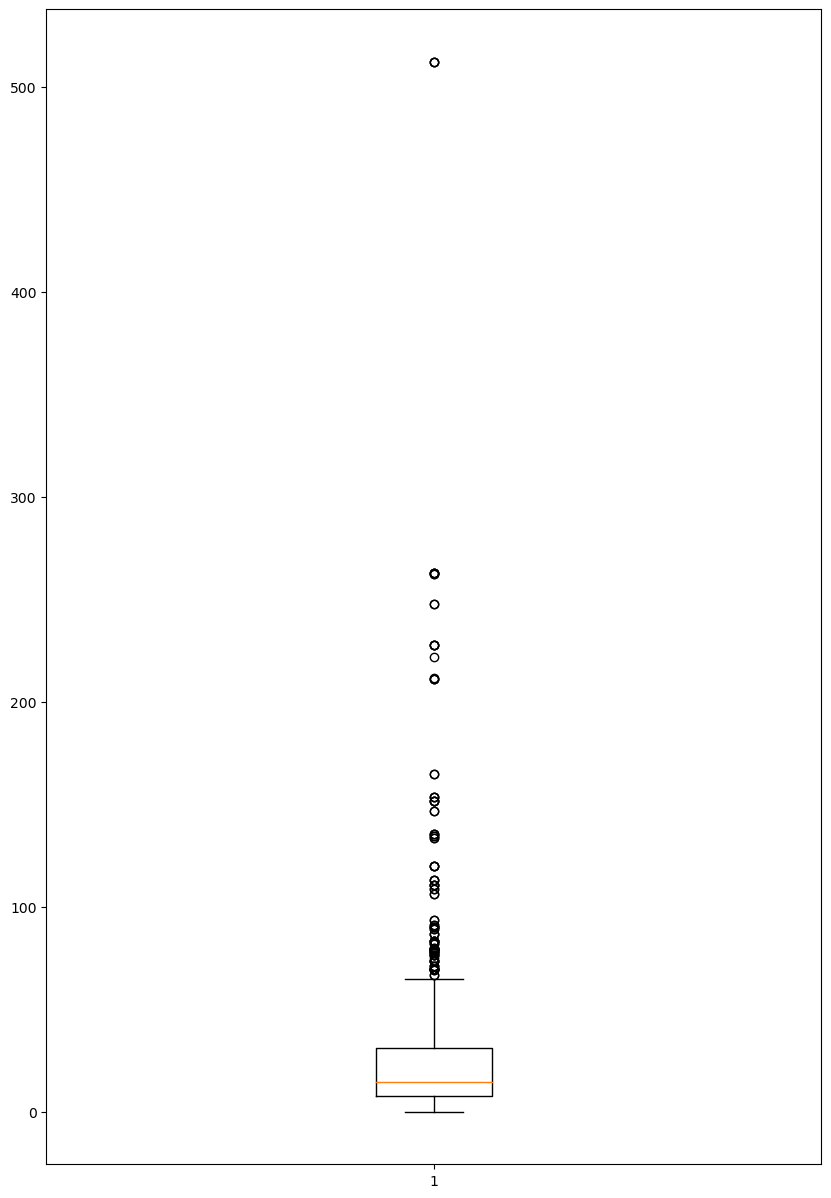

In [ ]:
plt.figure(figsize=(10,15))
plt.boxplot(titanic_survival["Fare"])

In [ ]:
def outliers(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[( df[col] > Q3 +  1.5 * IQR ) | (df[col] < Q1 - 1.5 * IQR)]

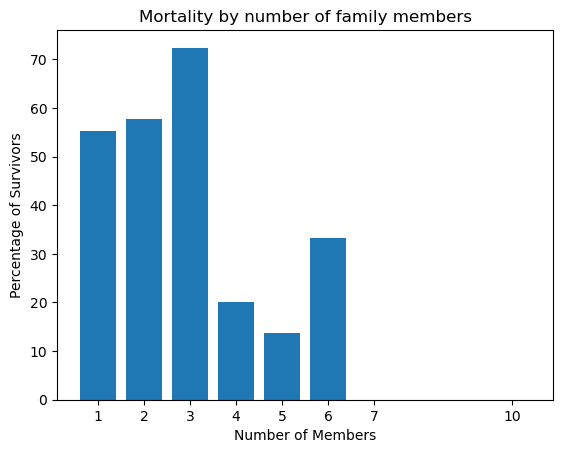

In [177]:
fig, ax = plt.subplots()

members = list(range(1,8)) + [10]
percentage = [55.27, 57.84, 72.41, 20, 13.63, 33.33, 0, 0] 

ax.bar(members, percentage)
ax.set_xlabel("Number of Members")
ax.set_ylabel("Percentage of Survivors")
ax.set_title("Mortality by number of family members")
ax.set_xticks(members)
